<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [86]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv("data/job_listings.csv")

print(df.shape)
df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [87]:
df = df.drop(["Unnamed: 0"], axis=1)

print(df.shape)
df.head()

(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [95]:
# Here html.unescape removes some of those
# pesky html elements created in conversion of
# the soup to string elements.

from html import unescape

description_text = []

for row in df["description"]:
    soup = BeautifulSoup(row, features="html")
    text = unescape(soup.get_text())
    description_text.append(text)

print(len(description_text))

426


## 2) Use Spacy to tokenize the listings 

In [96]:
nlp = spacy.load("en_core_web_lg")

new_stop_words = ["datum", "data"]

STOP_WORDS = nlp.Defaults.stop_words.union(new_stop_words)

In [97]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.lower().strip() for token in doc if (token.lemma_.lower().strip() not in STOP_WORDS) and (token.is_punct!=True) and (token.like_num==False) and (token.pos_ != "PRON")]

In [98]:
tokenized_description = []

for entry in description_text:
    tokenized_entry = tokenize(entry)
    tokenized_description.append(tokenized_entry)
    
print(len(tokenized_description))

426


In [99]:
df["tokenized_description"] = tokenized_description
df = df[["title", "description", "tokenized_description"]]

print(df.shape)
df.head()

(426, 3)


,title,description,tokenized_description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>...","[b""job, requirements:\nconceptual, understandi..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,"[b'job, description\n\na, scientist, help, bui..."
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...,"[b'as, scientist, work, consult, -pron-, busin..."
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-...","[b'$4,969, $, monthcontractunder, general, sup..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,"[b'location, usa, \xe2\x80\x93, multiple, loca..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [100]:
df["description_text"] = description_text
df = df[["title", "description", "description_text", "tokenized_description"]]

print(df.shape)
df.head()

(426, 4)


,title,description,description_text,tokenized_description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>...","b""Job Requirements:\nConceptual understanding ...","[b""job, requirements:\nconceptual, understandi..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'job, description\n\na, scientist, help, bui..."
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...,b'As a Data Scientist you will be working on c...,"[b'as, scientist, work, consult, -pron-, busin..."
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-...","b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $, monthcontractunder, general, sup..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,b'Location: USA \xe2\x80\x93 multiple location...,"[b'location, usa, \xe2\x80\x93, multiple, loca..."


In [101]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
dtm = vectorizer.fit_transform(df["description_text"])

dtm = pd.DataFrame(dtm.todense(), columns=vectorizer.get_feature_names())
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## 4) Visualize the most common word counts

In [73]:
from collections import Counter

# From the lecture notes

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [102]:
wc = count(df["tokenized_description"])
wc.head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
315,-pron-,379,2316,1.0,0.018580,0.018580,0.889671
58,work,368,1373,2.0,0.011015,0.029595,0.863850
292,team,359,1201,3.0,0.009635,0.039230,0.842723
205,business,320,1170,4.0,0.009386,0.048616,0.751174
20,experience,373,1137,5.0,0.009122,0.057738,0.875587
35,science,333,908,6.0,0.007284,0.065022,0.781690
85,product,269,815,7.0,0.006538,0.071560,0.631455
45,model,269,737,8.0,0.005913,0.077473,0.631455
463,use,302,715,9.0,0.005736,0.083209,0.708920
572,analysis,289,697,10.0,0.005592,0.088801,0.678404


In [108]:
top15 = wc.sort_values(by="pct_total", ascending=False).head(16)
top15

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
315,-pron-,379,2316,1.0,0.018580,0.018580,0.889671
58,work,368,1373,2.0,0.011015,0.029595,0.863850
292,team,359,1201,3.0,0.009635,0.039230,0.842723
205,business,320,1170,4.0,0.009386,0.048616,0.751174
20,experience,373,1137,5.0,0.009122,0.057738,0.875587
35,science,333,908,6.0,0.007284,0.065022,0.781690
85,product,269,815,7.0,0.006538,0.071560,0.631455
45,model,269,737,8.0,0.005913,0.077473,0.631455
463,use,302,715,9.0,0.005736,0.083209,0.708920
572,analysis,289,697,10.0,0.005592,0.088801,0.678404


In [109]:
top15 = top15.drop([315])
top15

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
58,work,368,1373,2.0,0.011015,0.029595,0.863850
292,team,359,1201,3.0,0.009635,0.039230,0.842723
205,business,320,1170,4.0,0.009386,0.048616,0.751174
20,experience,373,1137,5.0,0.009122,0.057738,0.875587
35,science,333,908,6.0,0.007284,0.065022,0.781690
85,product,269,815,7.0,0.006538,0.071560,0.631455
45,model,269,737,8.0,0.005913,0.077473,0.631455
463,use,302,715,9.0,0.005736,0.083209,0.708920
572,analysis,289,697,10.0,0.005592,0.088801,0.678404
33,machine,277,692,11.0,0.005552,0.094352,0.650235


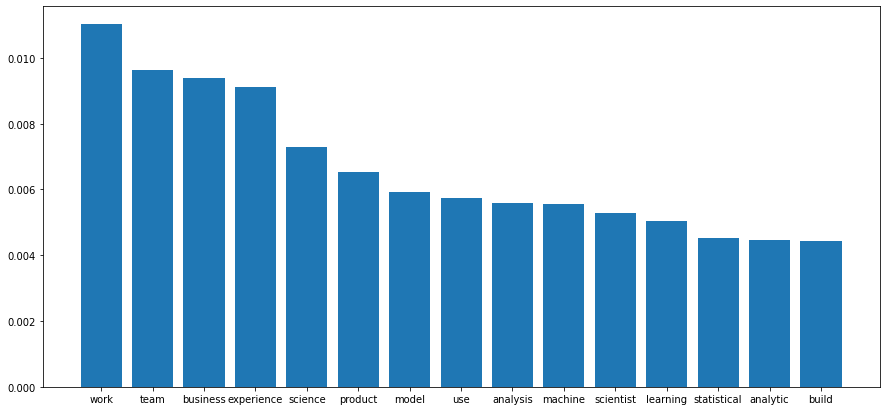

In [121]:
fig = plt.figure(figsize=(15,7))
ax = plt.axes()

ax.bar(top15.word, top15.pct_total);

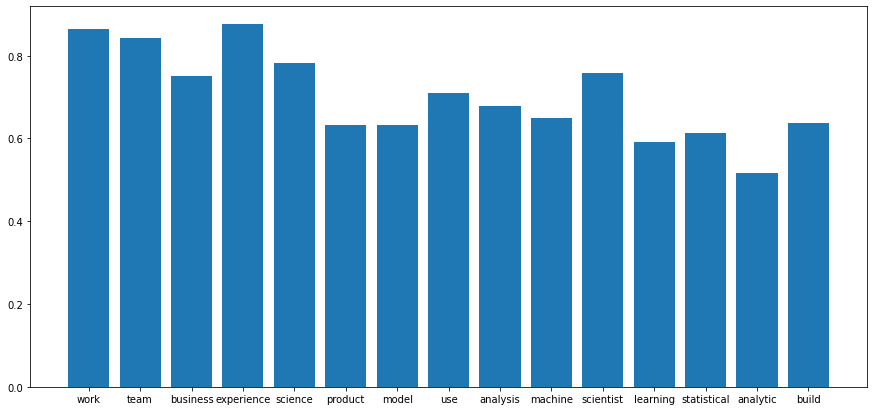

In [122]:
fig = plt.figure(figsize=(15,7))
ax = plt.axes()

ax.bar(top15.word, top15.appears_in_pct);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=5000)
dtm_tfidf = tfidf.fit_transform(df["description_text"])
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

print(dtm_tfidf.shape)
dtm_tfidf.head()

(426, 5000)


,000,000 employees,10,10 years,100,100 000,11,12,12 months,15,...,years relevant,years work,years working,years xe2,yes,york,york city,yrs,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [128]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm="kd_tree")
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [129]:
nn.kneighbors([dtm_tfidf.iloc[0].values])

(array([[0.        , 1.28508787, 1.29047849, 1.30597545, 1.3162439 ,
         1.31788402, 1.31965768, 1.32002432, 1.32548534, 1.32548534]]),
 array([[  0, 338, 115, 403, 366, 274, 336, 168, 138,  42]]))

In [130]:
df.description_text[0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [127]:
df.description_text[338]

'b"The FCA Manufacturing Planning and Control (MPC) organization is currently seeking a highly skilled, result-oriented Data Scientist to join our BDA (Big Data & Analytics) team at our FCA Headquarters in Auburn Hills, Michigan. The Data Scientist position offers the selected candidate an opportunity to be an integral part of a company whose challenge is to use statistical skills, coding experience and domain knowledge to provide key insights to specific problems. This position will develop complex analytic models, ensure actual adoption and value realization of the model, prove the validity of these models and be able to explain his findings to a non-technical audience. The Data Scientist will drive continuous improvement to the models based on results, feedback, and business requirements changes\\n\\nThe Data Scientist will first extract the data from various sources or databases, clean, structure, and understand the data. Then the candidate will analyze the data to answer specific 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 